# Ensemble Learning

In [29]:
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [30]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)

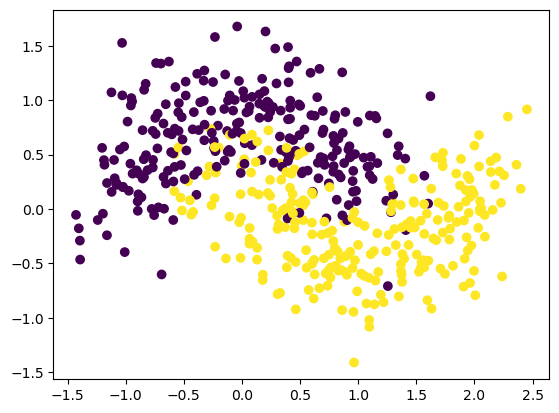

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import VotingClassifier

In [34]:
model_1 = DecisionTreeClassifier()
model_2 = KNeighborsClassifier()
model_3 = SGDClassifier()

model_4 = VotingClassifier(estimators=[('dt', model_1), ('knn', model_2), ('sgd', model_3)], voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.8866666666666667
KNeighborsClassifier 0.88
SGDClassifier 0.7733333333333333
VotingClassifier 0.88


## Bagging


In [35]:
model = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8866666666666667

In [36]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8866666666666667

## Boosting

In [37]:
model = AdaBoostClassifier(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

## Stacking

In [38]:
model = StackingClassifier(estimators=[('dt', model_1), ('knn', model_2), ('sgd', model_3)], final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.86